In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`

Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with= engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#most_recent_date = (Session.query(Measurement.date)
#             .order_by(Measurement.date.desc())
#                .first())
#most_recent_date

#most_recent_date = Session.query(func.max(Measurement.date)).scalar()
#most_recent_date

most_recent_date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

#last_12_months = most_recent_date - dt.timedelta(days=365)
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [11]:
# Calculate the date one year from the last date in data set.
prev_last_date = dt.date(last_12_months.year, last_12_months.month, last_12_months.day)


In [12]:


# Perform a query to retrieve the data and precipitation scores
results = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_last_date).order_by(Measurement.date).all()




In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(results, columns=['date','percipitation' ])
query_df


,date,percipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
3,2016-08-23,NaN
4,2016-08-23,0.5
...,...,...
2225,2017-08-22,12.7
2226,2017-08-23,0.0
2227,2017-08-23,0.0
2228,2017-08-23,2.0


In [14]:
# Sort the dataframe by date
query_df.set_index(query_df['date'], inplace= True)


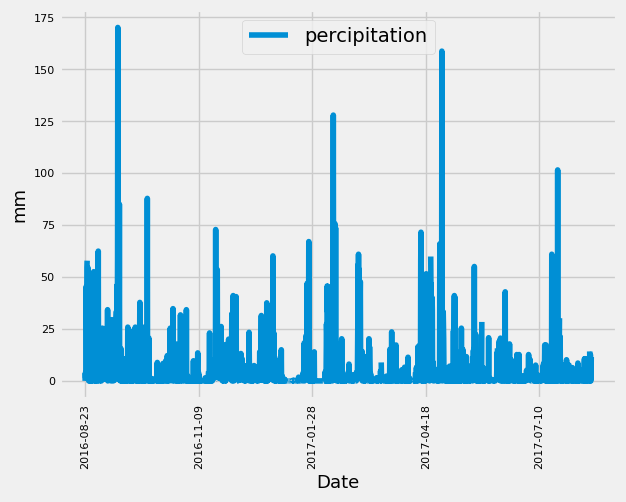

In [16]:

# Use Pandas Plotting with Matplotlib to plot the data
                   
query_df.plot('date', 'percipitation')


plt.xlabel("Date",  size = 13)
plt.ylabel("mm", size = 13)
plt.legend(["percipitation"],loc='upper center')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.savefig('query_df.png')
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_df.describe()

,percipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
Session.query(Station.id).count()

9

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

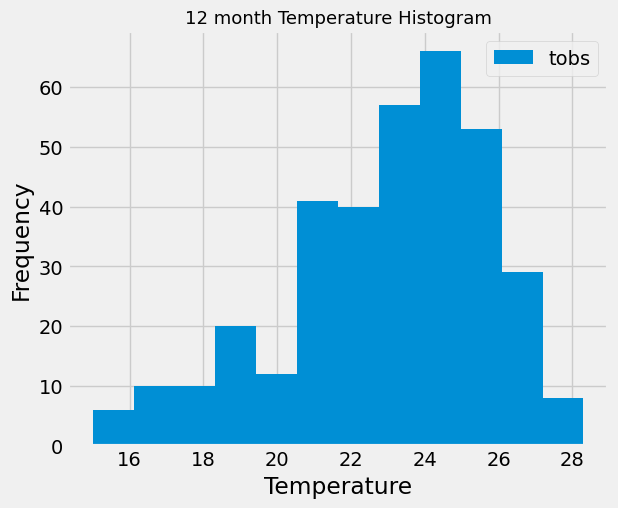

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Active_station = Session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

high_station_temp=pd.DataFrame(Active_station,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig('high_station_temp.png')
plt.show()

# Close Session

In [ ]:
# Close Session
Session.close()
